In [42]:
import pandas as pd
import pandas_ta as ta

df = pd.read_csv('downloads/mt/EURUSD_M5_202001020600_202408232355.csv', sep="\\t")
df['Gmt time'] = df['<DATE>'] + ' ' + df['<TIME>']


df.rename(columns={'<CLOSE>' : 'Close', '<HIGH>': 'High', '<OPEN>' : 'Open', '<LOW>':'Low'}, inplace=True)
# df = pd.read_csv("EURUSD_Candlestick_5_M_ASK_30.09.2019-30.09.2022.csv")
df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%Y.%m.%d %H:%M:%S')
df.drop(columns =['<DATE>', '<TIME>'], inplace=True)
df=df[df.High!=df.Low]
df.set_index("Gmt time", inplace=True)
df.drop(columns=['<TICKVOL>', '<SPREAD>', '<VOL>'], inplace=True)

C:\Users\S.Eyvazi\AppData\Local\Temp\ipykernel_83564\3735678224.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('downloads/mt/EURUSD_M5_202001020600_202408232355.csv', sep="\\t")


In [43]:
def feature_engineering(df):

    # Adding Simple Moving Averages
    df['sma5'] = ta.sma(df['Close'],window = 5)
    df['sma10'] = ta.sma(df['Close'],window = 10)
    df['sma15'] = ta.sma(df['Close'],window = 15)
    df['sma20'] = ta.sma(df['Close'],window = 20)
    df['sma30'] = ta.sma(df['Close'],window = 30)
    df['sma50'] = ta.sma(df['Close'],window = 50)
    df['sma80'] = ta.sma(df['Close'],window = 80)
    df['sma100'] = ta.sma(df['Close'],window = 100)
    df['sma200'] = ta.sma(df['Close'],window = 200)

    # Adding Price to Simple Moving Averages ratios

    df['sma5_ratio'] = df['Close'] / df['sma5']
    df['sma10_ratio'] = df['Close'] / df['sma10']
    df['sma20_ratio'] = df['Close'] / df['sma20']
    df['sma30_ratio'] = df['Close'] / df['sma30']
    df['sma50_ratio'] = df['Close'] / df['sma50']
    df['sma80_ratio'] = df['Close'] / df['sma80']
    df['sma100_ratio'] = df['Close'] / df['sma100']
    df['sma200_ratio'] = df['Close'] / df['sma200']

    # Adding RSI, CCI, Bollinger Bands, and OBV

    df['rsi'] = ta.rsi(df['Close'],length=14)
    df['cci'] = ta.cci(df['High'], df['Low'], df['Close'], window=20, constant=0.015)
    bb_indicator = ta.bbands(df['Close'], length=20, std=2)
    
    df=df.join(bb_indicator)

    # Adding features derived from the indicators above

    df['rsi_overbought'] = (df['rsi'] >= 70).astype(int)
    df['rsi_oversold'] = (df['rsi'] <= 30).astype(int)
    df['above_bb_high'] = (df['Close'] >= df['BBU_20_2.0']).astype(int)
    df['below_bb_low'] = (df['Close'] <= df['BBL_20_2.0']).astype(int)
    df['cci_high'] = (df['cci'] >= 120).astype(int)
    df['cci_low'] = (df['cci'] <= -120).astype(int)
    df['sma5 > sma10'] = (df['sma5'] > df['sma10']).astype(int)
    df['sma10 > sma15'] = (df['sma10'] > df['sma15']).astype(int)
    df['sma15 > sma20'] = (df['sma15'] > df['sma20']).astype(int)
    df['sma20 > sma30'] = (df['sma20'] > df['sma30']).astype(int)
    df['sma30 > sma50'] = (df['sma30'] > df['sma50']).astype(int)
    df['sma50 > sma80'] = (df['sma50'] > df['sma80']).astype(int)
    df['sma80 > sma100'] = (df['sma80'] > df['sma100']).astype(int)
    df['sma100 > sma200'] = (df['sma100'] > df['sma200']).astype(int)

    # Removing NaN values from the dataframe 
    df.dropna(inplace = True)
    return df

df = feature_engineering(df)

In [44]:
df

,Open,High,Low,Close,sma5,sma10,sma15,sma20,sma30,sma50,...,cci_high,cci_low,sma5 > sma10,sma10 > sma15,sma15 > sma20,sma20 > sma30,sma30 > sma50,sma50 > sma80,sma80 > sma100,sma100 > sma200
Gmt time,,,,,,,,,,,,,,,,,,,,,
2020-01-02 07:35:00,1.12022,1.12029,1.12021,1.12024,1.120223,1.120223,1.120223,1.120223,1.120223,1.120223,...,0,0,0,0,0,0,0,0,0,0
2020-01-02 07:40:00,1.12024,1.12032,1.12024,1.12029,1.120206,1.120206,1.120206,1.120206,1.120206,1.120206,...,0,0,0,0,0,0,0,0,0,0
2020-01-02 07:45:00,1.12029,1.12030,1.12018,1.12022,1.120217,1.120217,1.120217,1.120217,1.120217,1.120217,...,0,0,0,0,0,0,0,0,0,0
2020-01-02 07:50:00,1.12022,1.12037,1.12022,1.12037,1.120241,1.120241,1.120241,1.120241,1.120241,1.120241,...,0,0,0,0,0,0,0,0,0,0
2020-01-02 07:55:00,1.12037,1.12043,1.12028,1.12043,1.120257,1.120257,1.120257,1.120257,1.120257,1.120257,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-23 23:35:00,1.11914,1.11920,1.11911,1.11919,1.119034,1.119034,1.119034,1.119034,1.119034,1.119034,...,1,0,0,0,0,0,0,0,0,0
2024-08-23 23:40:00,1.11917,1.11932,1.11916,1.11931,1.119046,1.119046,1.119046,1.119046,1.119046,1.119046,...,1,0,0,0,0,0,0,0,0,0
2024-08-23 23:45:00,1.11931,1.11944,1.11921,1.11944,1.119078,1.119078,1.119078,1.119078,1.119078,1.119078,...,1,0,0,0,0,0,0,0,0,0


In [3]:
ema_50 = ta.ema(df.Close, length=50)
ema_30 = ta.ema(df.Close, length=30)
rsi_14 = ta.rsi(df.Close, length=14)
sma_50 = ta.sma(df.Close,length=50)
sma_30 = ta.sma(df.Close,length=30)
my_bbands = ta.bbands(df.Close, length=15, std=1.5)

df['cci'] = ta.cci(df['High'], df['Low'], df['Close'], window=20, constant=0.015)

atr_10 = ta.atr(df.High, df.Low, df.Close, length=10)
df = df.join(ema_50)
df = df.join(ema_30)
df = df.join(rsi_14)
df = df.join(atr_10)

df = df.join(my_bbands)
df = df.join(sma_50)
df = df.join(sma_30)
df = df.dropna()

df['prev_fast_sma'] = df['SMA_30'].shift(1)


In [4]:
from tqdm import tqdm
import numpy as np

def find_crossover(fast_sma, prev_fast_sma, slow_sma):

    if fast_sma > slow_sma and prev_fast_sma < slow_sma:
        return 1
    elif fast_sma < slow_sma and prev_fast_sma > slow_sma:
        return 2

    return 0


def rsi_signal(df, current_candle):
    if df[current_candle].RSI_14 > 70:
        return 1
    if df[current_candle].RSI_14 < 30:
        return 2

    return 0

tqdm.pandas()
df.reset_index(inplace=True)

conditions = [df['RSI_14'] <= 30,  (df['RSI_14'] > 30) & (df['RSI_14'] < 70), df['RSI_14'] >= 70]
choices = [0, 1, 2]
df['RSI_UP_TO_70'] = np.select(conditions, choices)


df['crossover'] = np.vectorize(find_crossover)(df['SMA_30'], df['prev_fast_sma'], df['SMA_50'])


E:\Project\Farabi\StockMarketData\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2480: RuntimeWarning: invalid value encountered in find_crossover (vectorized)
  outputs = ufunc(*inputs)


In [5]:
df.reset_index(drop=True, inplace=True)
df.set_index('Gmt time', inplace=True)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)

scaled_df.head()

,Open,High,Low,Close,<TICKVOL>,<VOL>,<SPREAD>,EMA_50,EMA_30,RSI_14,...,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,SMA_50,SMA_30,prev_fast_sma,RSI_UP_TO_70,crossover
Gmt time,,,,,,,,,,,,,,,,,,,,,
2020-01-02 10:05:00,0.596013,0.594705,0.594318,0.593286,0.024303,0.0,0.010870,0.593425,0.593311,0.458241,...,0.595529,0.593302,0.592572,0.020436,0.344598,0.593299,0.592935,NaN,0.5,0.0
2020-01-02 10:10:00,0.593272,0.593564,0.594496,0.594710,0.014234,0.0,0.016304,0.593466,0.593362,0.554946,...,0.595602,0.593376,0.592646,0.020451,0.597414,0.593273,0.593016,0.592935,0.5,0.5
2020-01-02 10:15:00,0.594696,0.593742,0.595493,0.595066,0.018169,0.0,0.010870,0.593519,0.593433,0.575863,...,0.595597,0.593417,0.592733,0.021384,0.650091,0.593255,0.593118,0.593016,0.5,0.0
2020-01-02 10:20:00,0.595052,0.594277,0.595493,0.594354,0.014582,0.0,0.010870,0.593541,0.593453,0.524829,...,0.595601,0.593421,0.592738,0.021400,0.521432,0.593215,0.593177,0.593118,0.5,0.0
2020-01-02 10:25:00,0.594340,0.593064,0.595066,0.593856,0.012267,0.0,0.010870,0.593543,0.593439,0.491593,...,0.595582,0.593409,0.592733,0.021539,0.434568,0.593166,0.593213,0.593177,0.5,0.0


In [45]:
import numpy as np

df['NextClose'] = df['Close'].shift(-1) - df['Close']


conditions = [df['NextClose'] <= 0, df['NextClose'] > 0 ]
choices = [0, 1]
df['Target'] = np.select(conditions, choices)


In [36]:
scaled_df

,Open,High,Low,Close,<TICKVOL>,<VOL>,<SPREAD>,EMA_50,EMA_30,RSI_14,...,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,SMA_50,SMA_30,prev_fast_sma,RSI_UP_TO_70,crossover,NextClose,Target
Gmt time,,,,,,,,,,,,,,,,,,,,,
2020-01-02 10:05:00,0.596013,0.594705,0.594318,0.593286,0.024303,0.0,0.010870,0.593425,0.593311,0.458241,...,0.592572,0.020436,0.344598,0.593299,0.592935,NaN,0.5,0.0,0.001424,2
2020-01-02 10:10:00,0.593272,0.593564,0.594496,0.594710,0.014234,0.0,0.016304,0.593466,0.593362,0.554946,...,0.592646,0.020451,0.597414,0.593273,0.593016,0.592935,0.5,0.5,0.000356,2
2020-01-02 10:15:00,0.594696,0.593742,0.595493,0.595066,0.018169,0.0,0.010870,0.593519,0.593433,0.575863,...,0.592733,0.021384,0.650091,0.593255,0.593118,0.593016,0.5,0.0,-0.000712,0
2020-01-02 10:20:00,0.595052,0.594277,0.595493,0.594354,0.014582,0.0,0.010870,0.593541,0.593453,0.524829,...,0.592738,0.021400,0.521432,0.593215,0.593177,0.593118,0.5,0.0,-0.000498,0
2020-01-02 10:25:00,0.594340,0.593064,0.595066,0.593856,0.012267,0.0,0.010870,0.593543,0.593439,0.491593,...,0.592733,0.021539,0.434568,0.593166,0.593213,0.593177,0.5,0.0,0.000178,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-23 23:35:00,0.588181,0.587071,0.589299,0.588374,0.020021,0.0,0.021739,0.585869,0.586917,0.556264,...,0.585795,0.011547,0.676303,0.586766,0.587409,0.587484,0.5,0.0,0.000427,2
2024-08-23 23:40:00,0.588288,0.587499,0.589477,0.588801,0.016202,0.0,0.021739,0.585972,0.586996,0.583460,...,0.585934,0.013442,0.759212,0.586924,0.587329,0.587409,0.5,0.0,0.000463,2
2024-08-23 23:45:00,0.588786,0.587927,0.589655,0.589263,0.010068,0.0,0.016304,0.586089,0.587100,0.611673,...,0.586190,0.016911,0.794622,0.587071,0.587277,0.587329,0.5,0.0,-0.000427,0


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

attribute = [ 'EMA_30', 'EMA_50', 'RSI_14', 'ATRr_10', 'BBL_15_1.5', 'BBU_15_1.5', 'BBM_15_1.5' ,'SMA_50', 'SMA_30', 'crossover', 'RSI_UP_TO_70', 'cci']
target = df['Target']
X_train, X_test, y_train, y_test = train_test_split(df[attribute], target, test_size=.3)

rf_model = RandomForestClassifier(max_depth=50, random_state=42,verbose=2, n_jobs=4, min_samples_split=50)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.1s


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   42.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


In [8]:
y_pred_train = rf_model.predict(X_train)
print('Accuracy For Test : {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Accuracy For Test : {:.3f}'.format(accuracy_score(y_pred_train, y_train)))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.3s


Accuracy For Test : 0.490
Accuracy For Test : 0.874


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [182]:
# import quantstats as qs

# Machine Learning 
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

df.dropna(inplace=True)
target = df['Target']
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Target', 'NextClose'], axis=1), target, test_size=.3)

sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

classifiers = [
    XGBClassifier(random_state = 42),
    LGBMClassifier(random_state = 42),
    AdaBoostClassifier(random_state = 42),
    RandomForestClassifier(random_state = 42, max_depth=35,min_samples_leaf=20, n_estimators=7)
]

#  Iteraring over classifiers in the list above, training, and evaluating them
k_folds = KFold(n_splits = 5)

for clf in classifiers:
    scores = cross_val_score(clf, X_train_scaled, y_train, cv = k_folds)
    
    clf.fit(X_train_scaled, y_train)
    
    y_pred = clf.predict_proba(X_test)[:,1]
    auc_score = roc_auc_score(y_test, y_pred)
    
    print(f'{type(clf).__name__}: AUC Score={auc_score:.3f}')
    print("CV Score.Mean and Std %: ", scores.mean() *100, np.std(scores) * 100)



XGBClassifier: AUC Score=0.506
Average CV Score.Mean and Std :  51.07840644644669 0.2032945106723474
[LightGBM] [Info] Number of positive: 94793, number of negative: 99382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7152
[LightGBM] [Info] Number of data points in the train set: 194175, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488183 -> initscore=-0.047275
[LightGBM] [Info] Start training from score -0.047275
[LightGBM] [Info] Number of positive: 94663, number of negative: 99512
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7152
[LightGBM] [Info] Number of data points in the train set: 194175, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: 

E:\Project\Farabi\StockMarketData\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\Project\Farabi\StockMarketData\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\Project\Farabi\StockMarketData\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\Project\Farabi\StockMarketData\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm t

AdaBoostClassifier: AUC Score=0.512
Average CV Score.Mean and Std :  51.69310916039333 0.21218832393710496
RandomForestClassifier: AUC Score=0.509
Average CV Score.Mean and Std :  50.655284390569 0.18984101172756496


E:\Project\Farabi\StockMarketData\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<Axes: >

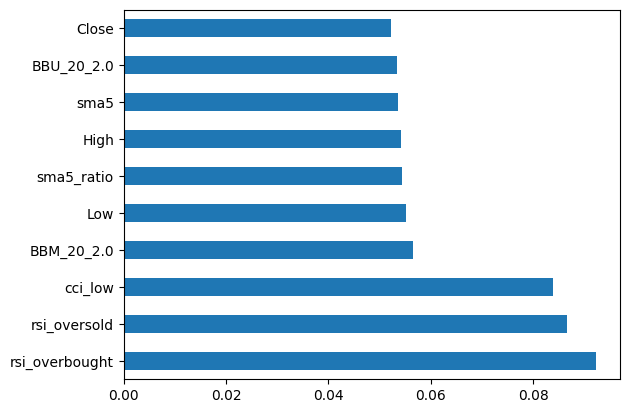

In [166]:
(pd.Series(classifiers[0].feature_importances_, index=df.drop(columns=['Target', 'NextClose'], axis=1).columns).nlargest(10).plot(kind='barh'))

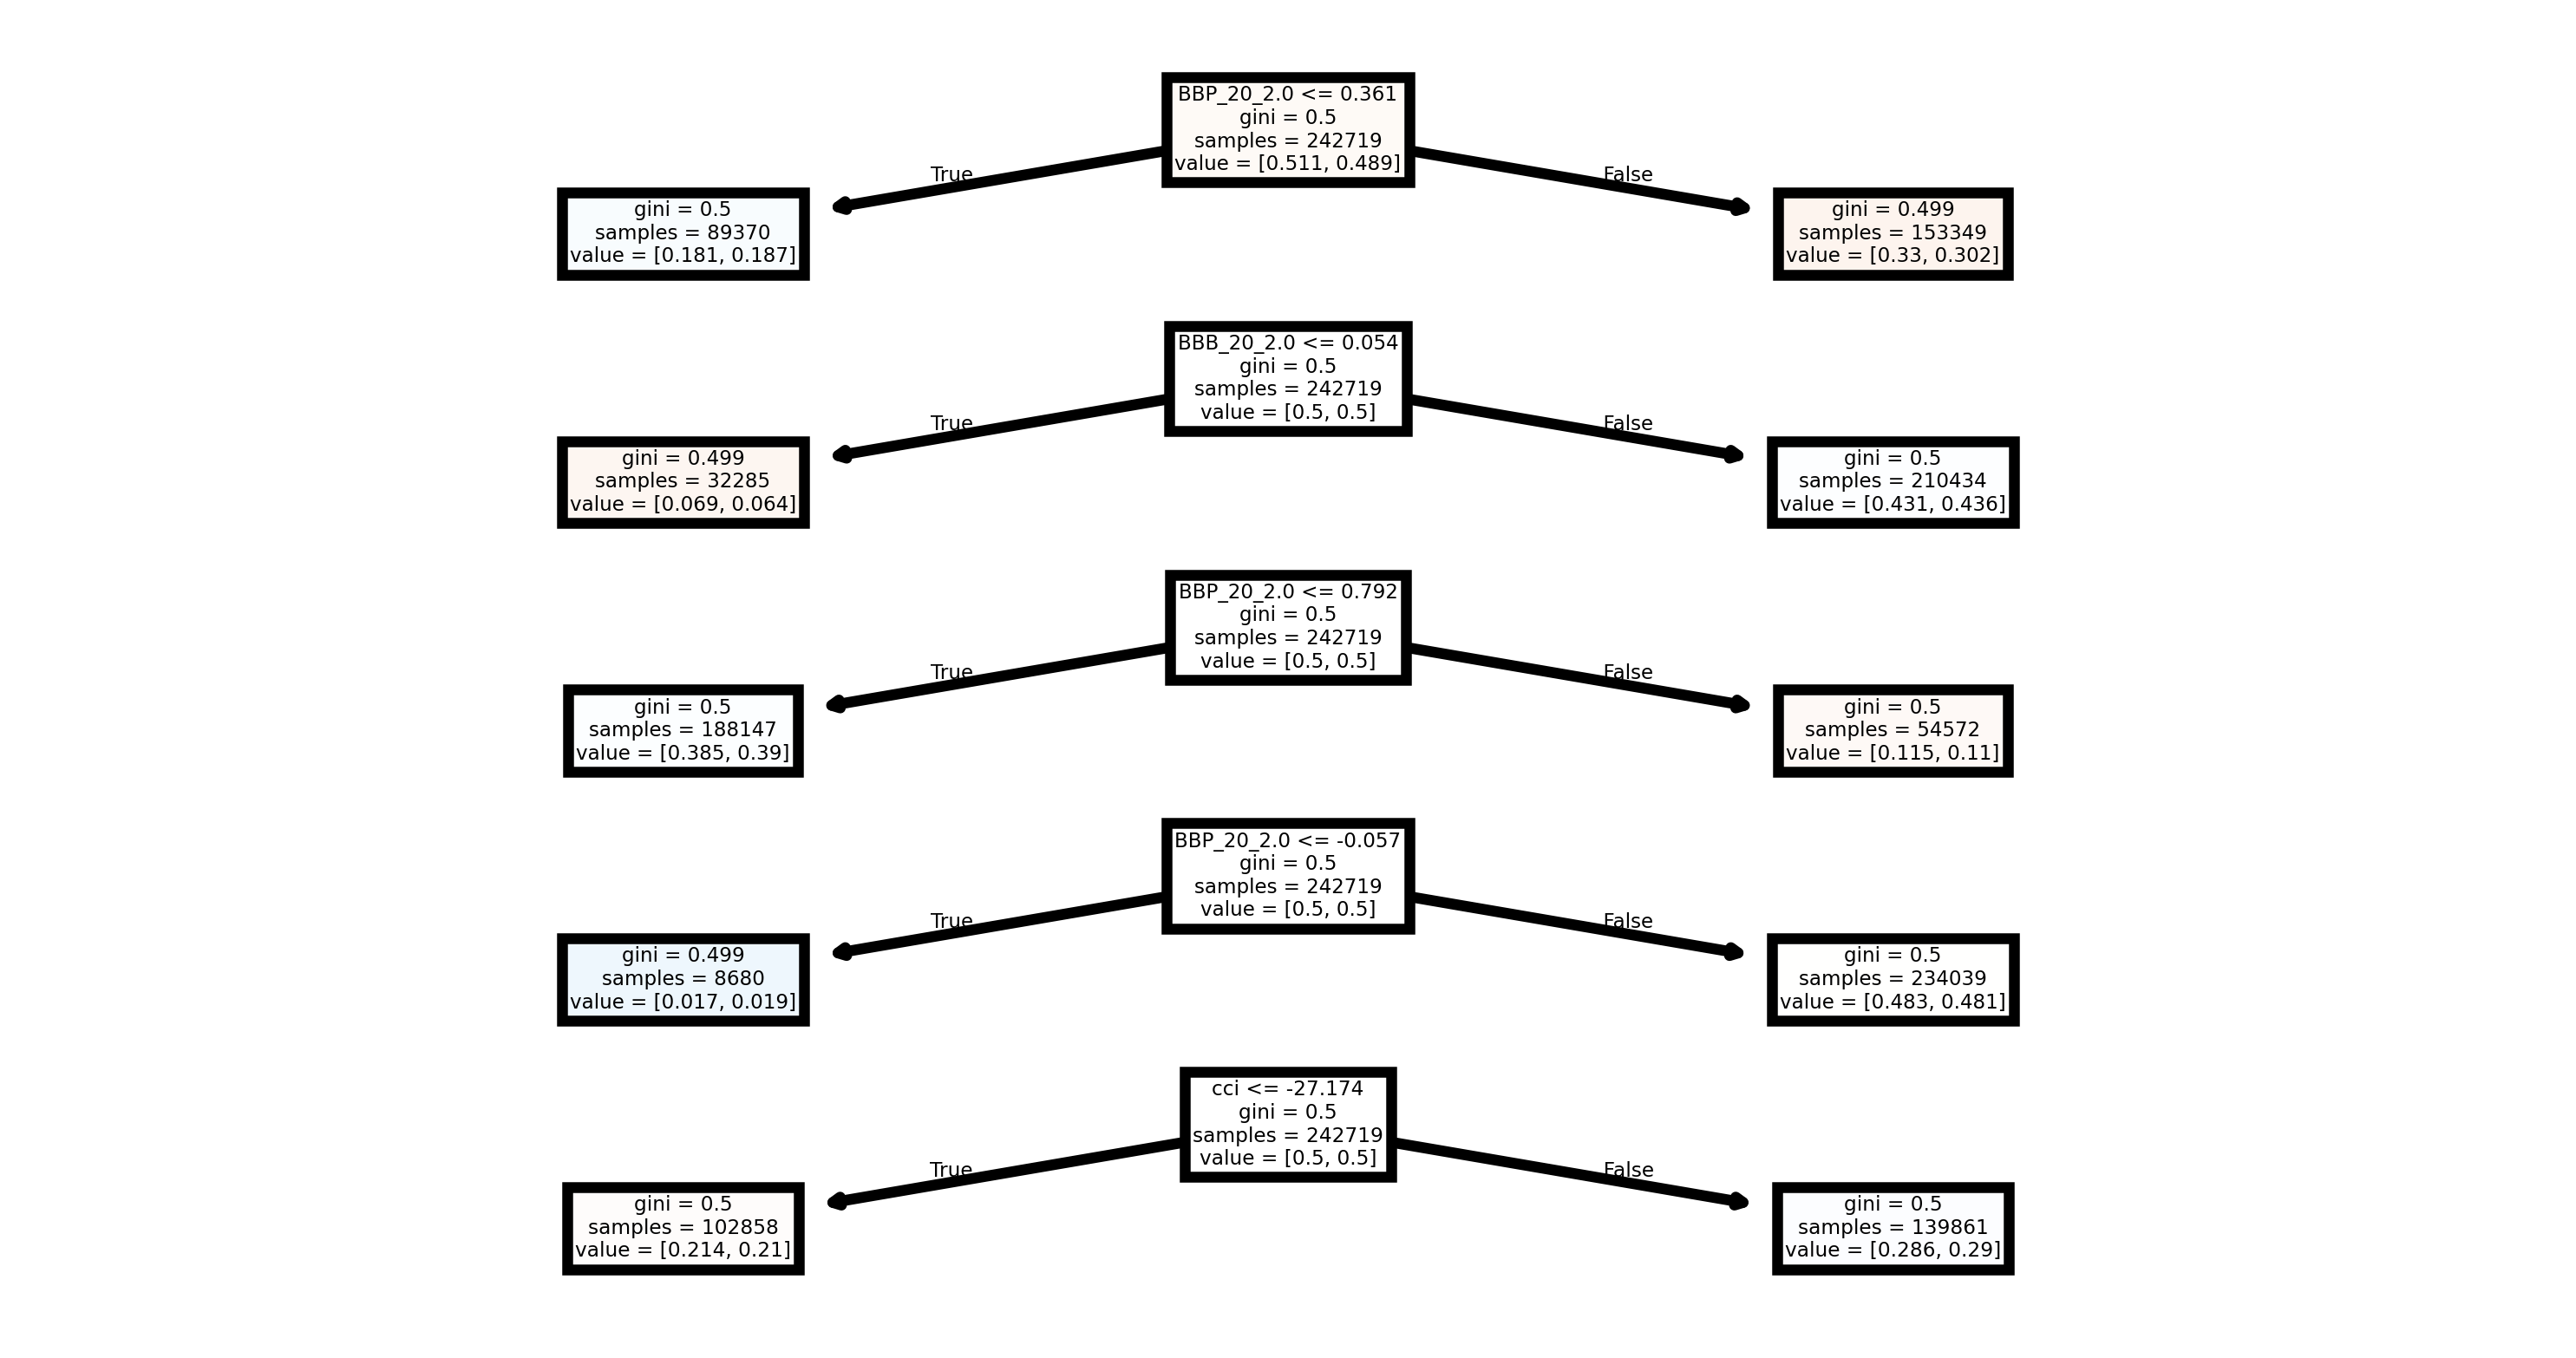

In [146]:
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
fn=df.drop(columns=['Target', 'NextClose'], axis=1).columns
cn=['Target']

fig, axes = plt.subplots(nrows = 5,ncols = 1,figsize = (4,2), dpi=900)

for item in range(0,5):
    tree.plot_tree(classifiers[2].estimators_[item],
                   feature_names = fn,filled = True,ax = axes[item]);



In [154]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# sample data
X, y = make_classification(n_samples=10000, n_features=100, n_classes=2, random_state=42)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the logistic regression model without scaling the data
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy without scaling:", accuracy_score(y_test, y_pred))

# Scale the data using MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train).apply(lambda x: (x - x.min())/(x.max() - x.min()))
# X_test_scaled = pd.DataFrame(X_test).apply(lambda x: (x - x.min())/(x.max() - x.min()))


# Fit the logistic regression model with scaled data
clf_scaled = LogisticRegression(max_iter=1000)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))

X_train_scaled = pd.DataFrame(X_train).apply(lambda x: (x - x.min())/(x.max() - x.min()))
X_test_scaled = pd.DataFrame(X_test).apply(lambda x: (x - x.min())/(x.max() - x.min()))



Accuracy without scaling: 0.895
Accuracy with scaling: 0.897
Accuracy with scaling 2: 0.8695


E:\Project\Farabi\StockMarketData\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


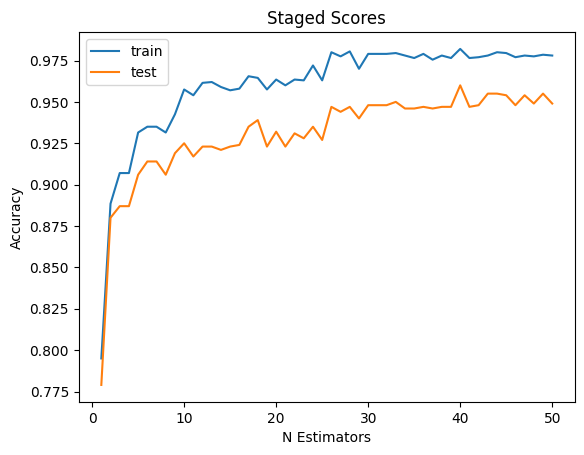

In [176]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # We will use simple stumps for individual estimators in AdaBoost.
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

nSamples = {'train' : 2000, 'test' : 1000}

X = np.random.uniform(size = (nSamples['train'] + nSamples['test'], 2))

# Decision boundary is the unit circle.
in_class = X[:, 0]**2 + X[:, 1]**2 > 1
y = np.zeros(len(X), dtype = int)
y[in_class] = 1

# Add some random error.
error_rate = 0.01
to_flip = np.random.choice(np.arange(len(y)), size = int(error_rate * len(y)), replace = False)
y[to_flip] = 1 - y[to_flip]

# Split training and test.
X = {'train' : X[:nSamples['train']],
     'test' : X[nSamples['train']:]}
y = {'train' : y[:nSamples['train']],
     'test' : y[nSamples['train']:]}

# Make AdaBoost Classifier.
max_estimators = 50
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1, # Just a stump.
                                                      random_state = np.random.RandomState(0)),
                               n_estimators = max_estimators,
                               random_state = np.random.RandomState(0))

# Fit all estimators.
ada_boost.fit(X['train'], y['train'])

# Get the test accuracy for each stage of prediction.
scores = {'train' : [], 'test' : []}

for y_predict_train, y_predict_test in zip(ada_boost.staged_predict(X['train']),
                                           ada_boost.staged_predict(X['test'])):
    scores['train'].append(accuracy_score(y['train'], y_predict_train))
    scores['test'].append(accuracy_score(y['test'], y_predict_test))

# Plot the results.
n_estimators = range(1, len(scores['train']) + 1)
for key in scores.keys():
    plt.plot(n_estimators, scores[key])
plt.title('Staged Scores')
plt.ylabel('Accuracy')
plt.xlabel('N Estimators')
plt.legend(scores.keys())
plt.show()

In [184]:
df

,Open,High,Low,Close,sma5,sma10,sma15,sma20,sma30,sma50,...,sma5 > sma10,sma10 > sma15,sma15 > sma20,sma20 > sma30,sma30 > sma50,sma50 > sma80,sma80 > sma100,sma100 > sma200,NextClose,Target
Gmt time,,,,,,,,,,,,,,,,,,,,,
2020-01-02 07:35:00,1.12022,1.12029,1.12021,1.12024,1.120223,1.120223,1.120223,1.120223,1.120223,1.120223,...,0,0,0,0,0,0,0,0,0.00005,1
2020-01-02 07:40:00,1.12024,1.12032,1.12024,1.12029,1.120206,1.120206,1.120206,1.120206,1.120206,1.120206,...,0,0,0,0,0,0,0,0,-0.00007,0
2020-01-02 07:45:00,1.12029,1.12030,1.12018,1.12022,1.120217,1.120217,1.120217,1.120217,1.120217,1.120217,...,0,0,0,0,0,0,0,0,0.00015,1
2020-01-02 07:50:00,1.12022,1.12037,1.12022,1.12037,1.120241,1.120241,1.120241,1.120241,1.120241,1.120241,...,0,0,0,0,0,0,0,0,0.00006,1
2020-01-02 07:55:00,1.12037,1.12043,1.12028,1.12043,1.120257,1.120257,1.120257,1.120257,1.120257,1.120257,...,0,0,0,0,0,0,0,0,0.00021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-23 23:30:00,1.11886,1.11916,1.11885,1.11914,1.119023,1.119023,1.119023,1.119023,1.119023,1.119023,...,0,0,0,0,0,0,0,0,0.00005,1
2024-08-23 23:35:00,1.11914,1.11920,1.11911,1.11919,1.119034,1.119034,1.119034,1.119034,1.119034,1.119034,...,0,0,0,0,0,0,0,0,0.00012,1
2024-08-23 23:40:00,1.11917,1.11932,1.11916,1.11931,1.119046,1.119046,1.119046,1.119046,1.119046,1.119046,...,0,0,0,0,0,0,0,0,0.00013,1
